In [7]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# load data
data = pd.read_csv('data/groupeddata.csv')
data.describe()

,Unnamed: 0.1,Unnamed: 0,id_student,total_score,attempted_weight,adjusted_mark,mark,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,module_presentation,total_click,cluster
count,24845.000000,24845.000000,2.484500e+04,24845.000000,24845.000000,20290.000000,20290.000000,24845.000000,24845.000000,24845.000000,24845.000000,24845.000000,24845.000000,24845.000000,24845.000000
mean,12888.353190,12888.353190,7.088956e+05,6278.312425,88.521864,52.043161,36.476826,1.763856,4.339545,1.309117,0.158060,76.753472,11.337774,1491.397303,0.467337
std,7466.377613,7466.377613,5.563283e+05,4066.873834,53.567691,23.731380,18.727194,0.732976,2.812941,0.477053,0.470696,38.329478,5.866715,1759.816547,0.822980
min,0.000000,0.000000,6.516000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,1.000000,0.000000,0.000000
25%,6413.000000,6413.000000,5.043520e+05,2776.000000,46.000000,38.397929,26.600000,1.000000,2.000000,1.000000,0.000000,60.000000,6.000000,381.000000,0.000000
50%,12854.000000,12854.000000,5.885240e+05,6620.000000,100.000000,53.907043,36.600000,2.000000,4.000000,1.000000,0.000000,60.000000,11.000000,877.000000,0.000000
75%,19356.000000,19356.000000,6.425510e+05,8426.000000,100.000000,67.607075,43.800000,2.000000,7.000000,2.000000,0.000000,90.000000,17.000000,1936.000000,1.000000
max,25842.000000,25842.000000,2.698588e+06,19790.000000,200.000000,100.000000,99.000000,4.000000,9.000000,3.000000,6.000000,630.000000,22.000000,24139.000000,2.000000


In [3]:
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]
df3 = data[data['cluster']==2]

In [4]:
df1.shape

(18555, 21)

In [5]:
df2.shape

(969, 21)

In [6]:
df3.shape

(5321, 21)

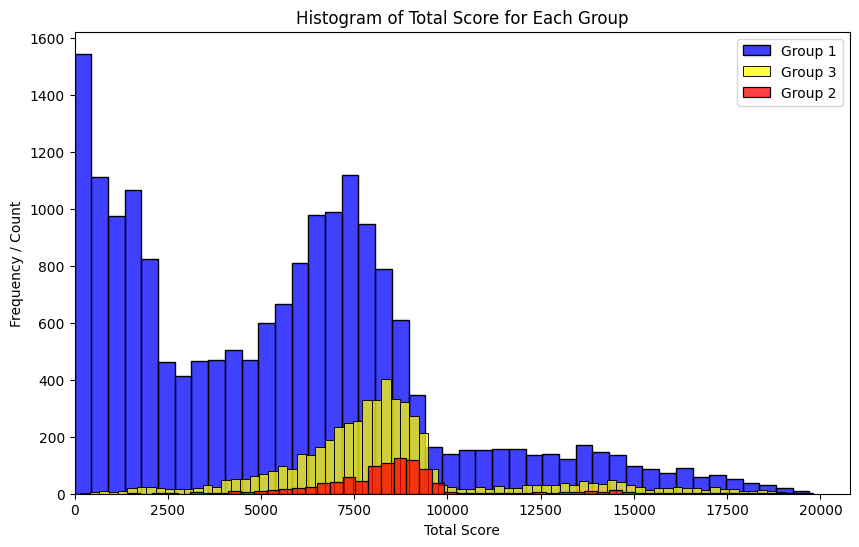

In [8]:
fig = plt.figure(figsize=(10,6))

sns.histplot(df1['total_score'], color='blue', label='Group 1')
sns.histplot(df3['total_score'], color='yellow', label='Group 3')
sns.histplot(df2['total_score'], color='red', label='Group 2')

plt.legend()
plt.xlabel('Total Score')
plt.ylabel('Frequency / Count')
plt.title('Histogram of Total Score for Each Group')

plt.xlim(left=0)  # Adjust the x-axis limit to include 0
plt.ylim(bottom=0)  # Adjust the y-axis limit to include 0

plt.show()

   final_result  cluster          0
0   Distinction  Group 3  63.614499
1   Distinction  Group 2   6.888851
2   Distinction  Group 1  29.496650
3          Fail  Group 3  90.793340
4          Fail  Group 2   0.744368
5          Fail  Group 1   8.462292
6          Pass  Group 3  62.900470
7          Pass  Group 2   5.531824
8          Pass  Group 1  31.567706
9     Withdrawn  Group 3  94.994512
10    Withdrawn  Group 2   0.263447
11    Withdrawn  Group 1   4.742042


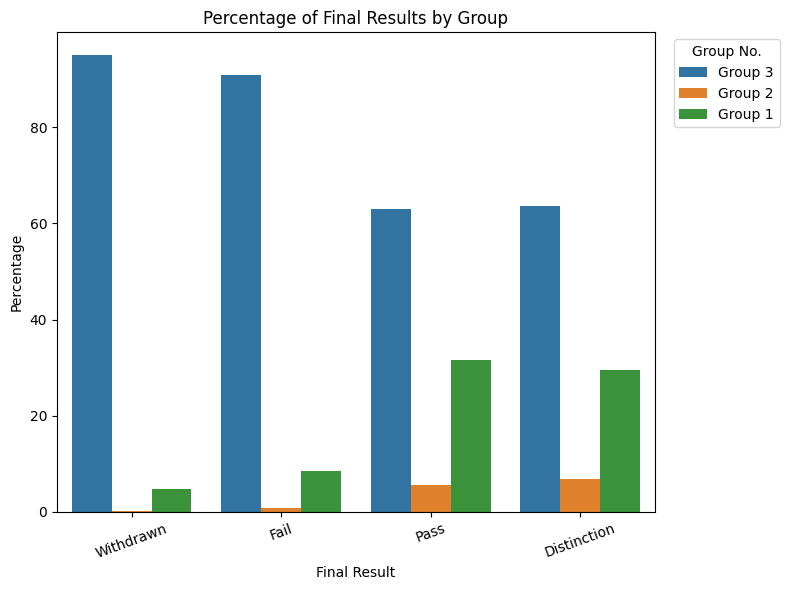

In [64]:
desired_order=["Withdrawn", "Fail", "Pass", "Distinction"]
# Define the desired order of the final_result categories

# Group the data by age band and final result, and calculate the percentage
grouped_data = data.groupby(['final_result', 'cluster']).size()
percentage = grouped_data / grouped_data.groupby('final_result').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()
percentage['cluster'] = percentage['cluster'].replace({0: 'Group 3', 1: 'Group 2', 2: 'Group 1'})
print(percentage)

plt.figure(figsize=(8, 6))
sns.barplot(data=percentage, x='final_result', y=0, hue='cluster', order=desired_order)
plt.xlabel('Final Result')
plt.ylabel('Percentage')
plt.title('Percentage of Final Results by Group')
plt.legend(title='Group No.', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

  age_band  cluster          0
0     0-35  Group 3  77.513121
1     0-35  Group 2   2.664514
2     0-35  Group 1  19.822366
3    35-55  Group 3  68.671577
4    35-55  Group 2   6.601200
5    35-55  Group 1  24.727223
6     55<=  Group 3  45.977011
7     55<=  Group 2  13.218391
8     55<=  Group 1  40.804598


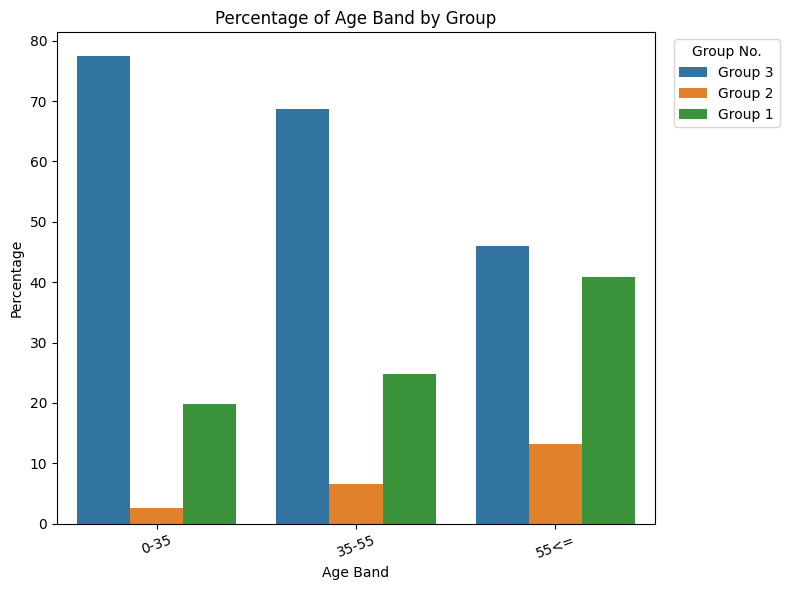

In [66]:
desired_order=["0-35", "35-55", "55<="]
# Define the desired order of the final_result categories

# Group the data by age band and final result, and calculate the percentage
grouped_data = data.groupby(['age_band', 'cluster']).size()
percentage = grouped_data / grouped_data.groupby('age_band').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()
percentage['cluster'] = percentage['cluster'].replace({0: 'Group 3', 1: 'Group 2', 2: 'Group 1'})
percentage['age_band'] = percentage['age_band'].replace({1:"0-35", 2:"35-55", 3:"55<="})
print(percentage)

plt.figure(figsize=(8, 6))
sns.barplot(data=percentage, x='age_band', y=0, hue='cluster', order=desired_order)
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.title('Percentage of Age Band by Group')
plt.legend(title='Group No.', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

   imd_band  cluster          0
0     0-10%  Group 3  78.780387
1     0-10%  Group 2   3.255047
2     0-10%  Group 1  17.964565
3    10-20%  Group 3  77.385972
4    10-20%  Group 2   3.104638
5    10-20%  Group 1  19.509391
6    20-30%  Group 3  77.082575
7    20-30%  Group 2   4.074209
8    20-30%  Group 1  18.843216
9    30-40%  Group 3  74.928058
10   30-40%  Group 2   4.136691
11   30-40%  Group 1  20.935252
12   40-50%  Group 3  75.558167
13   40-50%  Group 2   3.446925
14   40-50%  Group 1  20.994908
15   50-60%  Group 3  74.519042
16   50-60%  Group 2   4.318806
17   50-60%  Group 1  21.162152
18   60-70%  Group 3  74.120603
19   60-70%  Group 2   3.894472
20   60-70%  Group 1  21.984925
21   70-80%  Group 3  72.166247
22   70-80%  Group 2   3.526448
23   70-80%  Group 1  24.307305
24   80-90%  Group 3  70.616740
25   80-90%  Group 2   4.757709
26   80-90%  Group 1  24.625551
27  90-100%  Group 3  70.233645
28  90-100%  Group 2   4.626168
29  90-100%  Group 1  25.140187


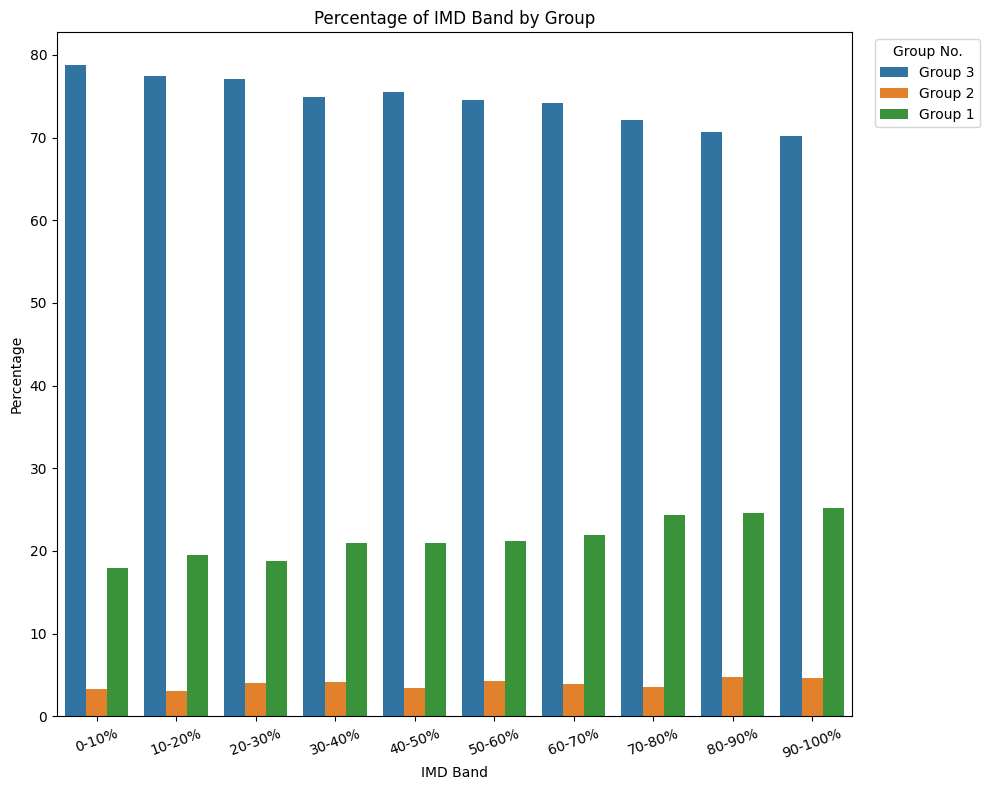

In [67]:
desired_order=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]
# Define the desired order of the final_result categories

# Group the data by age band and final result, and calculate the percentage
grouped_data = data.groupby(['imd_band', 'cluster']).size()
percentage = grouped_data / grouped_data.groupby('imd_band').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()
percentage['cluster'] = percentage['cluster'].replace({0: 'Group 3', 1: 'Group 2', 2: 'Group 1'})
percentage['imd_band'] = percentage['imd_band'].replace({0:"0-10%", 1:"10-20%", 2:"20-30%", 3:"30-40%", 4:"40-50%", 5:"50-60%", 6:"60-70%", 7:"70-80%", 8:"80-90%", 9:"90-100%"})
print(percentage)

plt.figure(figsize=(10, 8))
sns.barplot(data=percentage, x='imd_band', y=0, hue='cluster', order=desired_order)
plt.xlabel('IMD Band')
plt.ylabel('Percentage')
plt.title('Percentage of IMD Band by Group')
plt.legend(title='Group No.', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

              highest_education  cluster          0
0               No Formal quals  Group 3  83.886256
1               No Formal quals  Group 2   4.739336
2               No Formal quals  Group 1  11.374408
3            Lower Than A Level  Group 3  77.299516
4            Lower Than A Level  Group 2   3.872869
5            Lower Than A Level  Group 1  18.827615
6         A Level or Equivalent  Group 3  74.439502
7         A Level or Equivalent  Group 2   3.487544
8         A Level or Equivalent  Group 1  22.072954
9              HE Qualification  Group 3  68.795278
10             HE Qualification  Group 2   5.178428
11             HE Qualification  Group 1  26.026295
12  Post Graduate Qualification  Group 3  61.818182
13  Post Graduate Qualification  Group 2   3.636364
14  Post Graduate Qualification  Group 1  34.545455


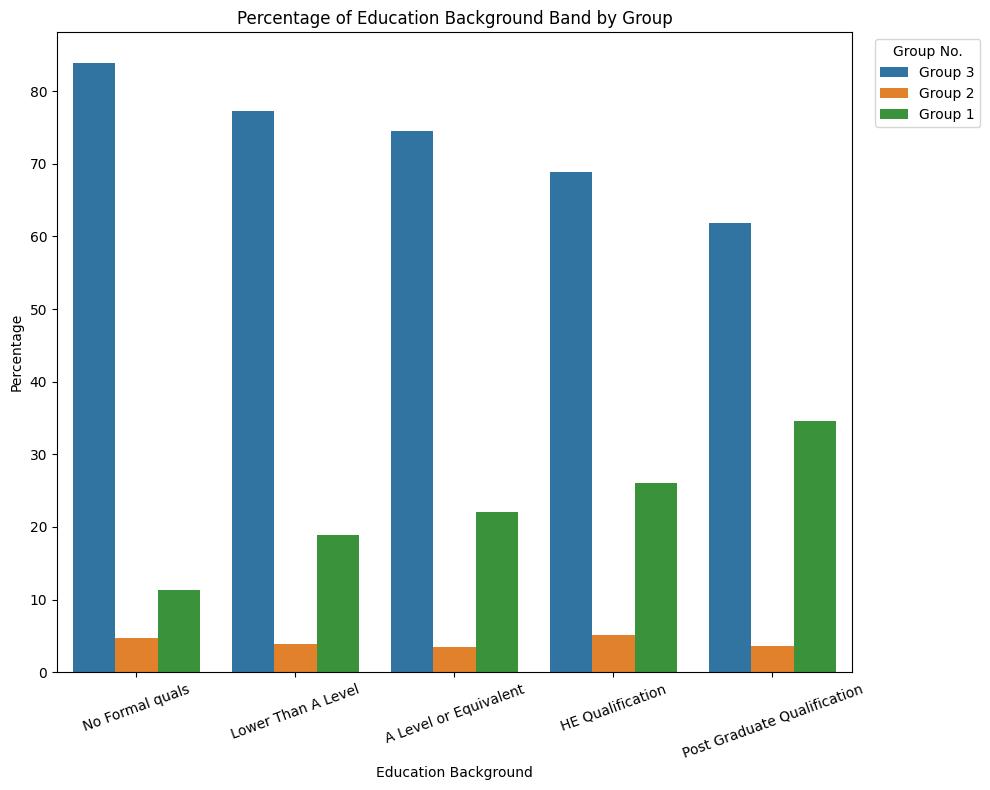

In [68]:
desired_order=["No Formal quals", "Lower Than A Level", "A Level or Equivalent", "HE Qualification", "Post Graduate Qualification"]
# Define the desired order of the final_result categories

# Group the data by age band and final result, and calculate the percentage
grouped_data = data.groupby(['highest_education', 'cluster']).size()
percentage = grouped_data / grouped_data.groupby('highest_education').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()
percentage['cluster'] = percentage['cluster'].replace({0: 'Group 3', 1: 'Group 2', 2: 'Group 1'})
percentage['highest_education'] = percentage['highest_education'].replace({0:"No Formal quals", 1:"Lower Than A Level", 2:"A Level or Equivalent", 3:"HE Qualification", 4:"Post Graduate Qualification"})
print(percentage)

plt.figure(figsize=(10, 8))
sns.barplot(data=percentage, x='highest_education', y=0, hue='cluster', order=desired_order)
plt.xlabel('Education Background')
plt.ylabel('Percentage')
plt.title('Percentage of Education Background Band by Group')
plt.legend(title='Group No.', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

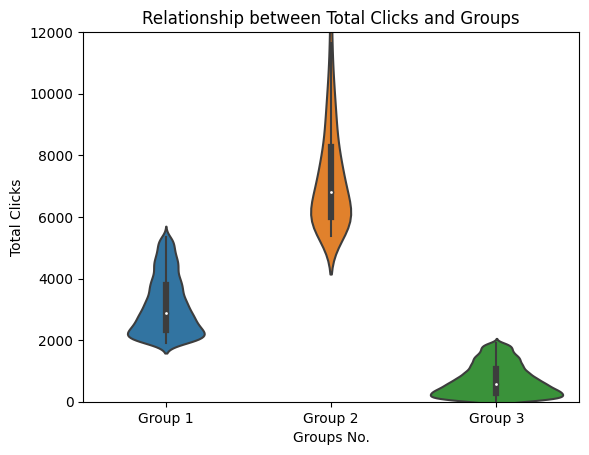

In [79]:
# Create the violin plot
data_copy=data
data_copy["cluster"] = data_copy["cluster"].replace({0: 'Group 3', 1: 'Group 2', 2: 'Group 1'})
# ["Group 1", "Group 2", "Group 3"]
sns.violinplot(data=data_copy, x='cluster', y='total_click', order=["Group 1", "Group 2", "Group 3"])
plt.ylim(0, 12000)
# Add labels and title
plt.xlabel('Groups No.')
plt.ylabel('Total Clicks')
plt.title('Relationship between Total Clicks and Groups')

# Show the plot
plt.show()